# IMPORTS

In [301]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import json
import matplotlib.pyplot as plt
import math

# DATA

In [302]:
data = {
  "Monday": {
    "3": {
      "1": {
        "1": [
          {"in": 5, "out": 0, "total": 5},
          {"in": 6, "out": 1, "total": 10},
          {"in": 8, "out": 2, "total": 16}
        ],
        "2": [
          {"in": 9, "out": 1, "total": 18},
          {"in": 10, "out": 2, "total": 26},
          {"in": 11, "out": 3, "total": 34}
        ],
        "3": [
          {"in": 12, "out": 2, "total": 28},
          {"in": 13, "out": 3, "total": 38},
          {"in": 14, "out": 4, "total": 48}
        ],
        "4": [
          {"in": 15, "out": 3, "total": 40},
          {"in": 14, "out": 4, "total": 50},
          {"in": 13, "out": 5, "total": 48}
        ],
        "5": [
          {"in": 12, "out": 4, "total": 38},
          {"in": 11, "out": 5, "total": 34},
          {"in": 10, "out": 6, "total": 28}
        ],
        "6": [
          {"in": 8, "out": 5, "total": 21},
          {"in": 7, "out": 6, "total": 15},
          {"in": 6, "out": 7, "total": 10}
        ],
        "7": [
          {"in": 5, "out": 6, "total": 9},
          {"in": 4, "out": 7, "total": 6},
          {"in": 3, "out": 8, "total": 4}
        ],
        "8": [
          {"in": 3, "out": 7, "total": 3},
          {"in": 2, "out": 8, "total": 2},
          {"in": 1, "out": 9, "total": 1}
        ],
        "9": [
          {"in": 1, "out": 8, "total": 1},
          {"in": 0, "out": 7, "total": 0},
          {"in": 0, "out": 6, "total": 0}
        ],
        "10": [
          {"in": 0, "out": 6, "total": 0},
          {"in": 0, "out": 5, "total": 0},
          {"in": 0, "out": 4, "total": 0}
        ]
      },
      "2": {
        "1": [
          {"in": 3, "out": 0, "total": 3},
          {"in": 4, "out": 1, "total": 6},
          {"in": 6, "out": 2, "total": 10}
        ],
        "2": [
          {"in": 8, "out": 1, "total": 15},
          {"in": 9, "out": 2, "total": 22},
          {"in": 10, "out": 3, "total": 29}
        ],
        "3": [
          {"in": 11, "out": 2, "total": 28},
          {"in": 12, "out": 3, "total": 37},
          {"in": 13, "out": 4, "total": 46}
        ],
        "4": [
          {"in": 14, "out": 3, "total": 45},
          {"in": 13, "out": 4, "total": 54},
          {"in": 12, "out": 5, "total": 51}
        ],
        "5": [
          {"in": 11, "out": 4, "total": 49},
          {"in": 10, "out": 5, "total": 44},
          {"in": 9, "out": 6, "total": 37}
        ],
        "6": [
          {"in": 8, "out": 5, "total": 30},
          {"in": 7, "out": 6, "total": 23},
          {"in": 6, "out": 7, "total": 17}
        ],
        "7": [
          {"in": 5, "out": 6, "total": 14},
          {"in": 4, "out": 7, "total": 10},
          {"in": 3, "out": 8, "total": 7}
        ],
        "8": [
          {"in": 3, "out": 7, "total": 5},
          {"in": 2, "out": 8, "total": 3},
          {"in": 1, "out": 9, "total": 2}
        ],
        "9": [
          {"in": 1, "out": 8, "total": 2},
          {"in": 0, "out": 7, "total": 1},
          {"in": 0, "out": 6, "total": 1}
        ],
        "10": [
          {"in": 0, "out": 6, "total": 1},
          {"in": 0, "out": 5, "total": 0},
          {"in": 0, "out": 4, "total": 0}
        ]
      }
    }
  }
}



# PLOT FUNCTION

In [311]:
def plot_bus_stop_data(N_cycle: str, route_ID: str, day: str, data: dict, M: int):
    bus_stops = []
    totals = [[] for _ in range(M)]
    
    for bus_stop, cycles in data[day][route_ID][N_cycle].items():
        bus_stops.append(int(bus_stop))
        for week in range(M):
            totals[week].append(cycles[week]['total'])

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'yellow']
    for week in range(M):
        plt.scatter(bus_stops, totals[week], color=colors[week % len(colors)], label=f'Week {week + 1}')
    
    plt.title(f'Total People vs. Bus Stops (Cycle {N_cycle} on {day})')
    plt.xlabel('Bus Stop ID')
    plt.ylabel('Total People')
    plt.grid(True)
    plt.xticks(bus_stops)
    plt.yticks(range(0, 56, 5))
    plt.tight_layout()
    plt.legend()
    plt.show()

In [310]:
def plot_predicted_bus_stop_data(N_cycle: str, route_ID: str, day: str, data: dict):
    bus_stops = []
    totals = []
    
    for bus_stop, details in data[day][route_ID][N_cycle].items():
        bus_stops.append(int(bus_stop))
        totals.append(details['total'])

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    
    plt.scatter(bus_stops, totals, color='blue', label=f'{day}')
    
    plt.title(f'Total People vs. Bus Stops (Cycle {N_cycle} on {day})')
    plt.xlabel('Bus Stop ID')
    plt.ylabel('Total People')
    plt.grid(True)
    plt.xticks(bus_stops)
    plt.yticks(range(0, 56, 5))
    plt.tight_layout()
    plt.legend()
    plt.show()


# MODEL BUILDING

In [156]:
def predict_next_week(bus_stop_id, cycle, model):
    return model.predict(pd.DataFrame({'bus_stop_id': [bus_stop_id], 'cycle': [cycle]}))[0]

In [314]:
def generate_model_outputs(N_cycle: str, route_ID: str, day: str, bus_stop_id: int, data: dict, M: int):
    rows = []
    for bus_stop, cycles in data[day][route_ID][N_cycle].items():
        for week in range(M):
            rows.append({'bus_stop_id': int(bus_stop), 'cycle': week+1, 'total': cycles[week]['total']})
    
    df = pd.DataFrame(rows)
    df = df.sort_values(by = ['cycle', 'bus_stop_id'], ascending = True)
    X = df[['bus_stop_id', 'cycle']]
    y = df['total']


    degree = 17
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    ans = predict_next_week(bus_stop_id, N_cycle, model)
    return math.ceil(ans) if ans > 0 else 0


# TESTING

In [315]:
A = generate_model_outputs(N_cycle='2', route_ID='3', day = 'Monday', bus_stop_id=1, data=data, M = 3)

In [316]:
A

11

# GENERATING NEXT WEEK

In [317]:
def generate_next_week_data(data: dict, M: int):
    next_week_data = {}

    for day, route_data in data.items():
        next_week_data[f"next {day}"] = {}

        for route_ID, cycle_data in route_data.items():
            next_week_data[f"next {day}"][route_ID] = {}

            for N_cycle, stops_data in cycle_data.items():
                next_week_data[f"next {day}"][route_ID][N_cycle] = {}


                for bus_stop_id, _ in stops_data.items():
                    total_people = generate_model_outputs(N_cycle, route_ID, day, bus_stop_id, data, M)
                    next_week_data[f"next {day}"][route_ID][N_cycle][bus_stop_id] = {
                        'total': total_people
                    }

    return next_week_data
next_week_data = generate_next_week_data(data = data, M = 3)

In [318]:
next_week_data

{'next Monday': {'3': {'1': {'1': {'total': 10},
    '2': {'total': 23},
    '3': {'total': 33},
    '4': {'total': 44},
    '5': {'total': 38},
    '6': {'total': 15},
    '7': {'total': 11},
    '8': {'total': 3},
    '9': {'total': 1},
    '10': {'total': 1}},
   '2': {'1': {'total': 11},
    '2': {'total': 27},
    '3': {'total': 42},
    '4': {'total': 57},
    '5': {'total': 39},
    '6': {'total': 12},
    '7': {'total': 17},
    '8': {'total': 2},
    '9': {'total': 2},
    '10': {'total': 1}}}}}

In [321]:
with open("next_week.json", "w") as f:
    json.dump(next_week_data, f, indent=4)

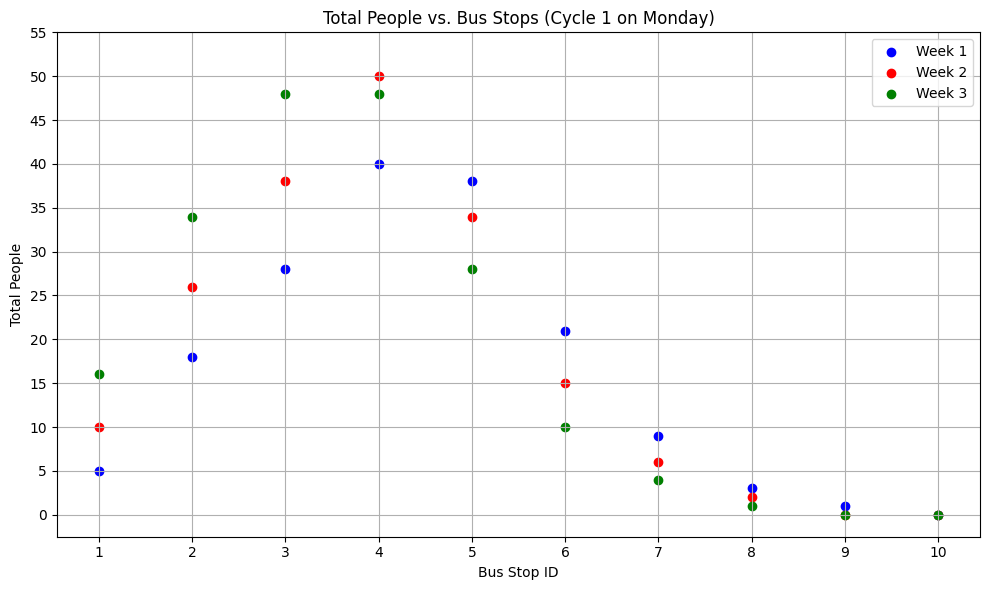

In [323]:
plot_bus_stop_data(N_cycle='1', route_ID='3', day='Monday', data = data, M = 3)

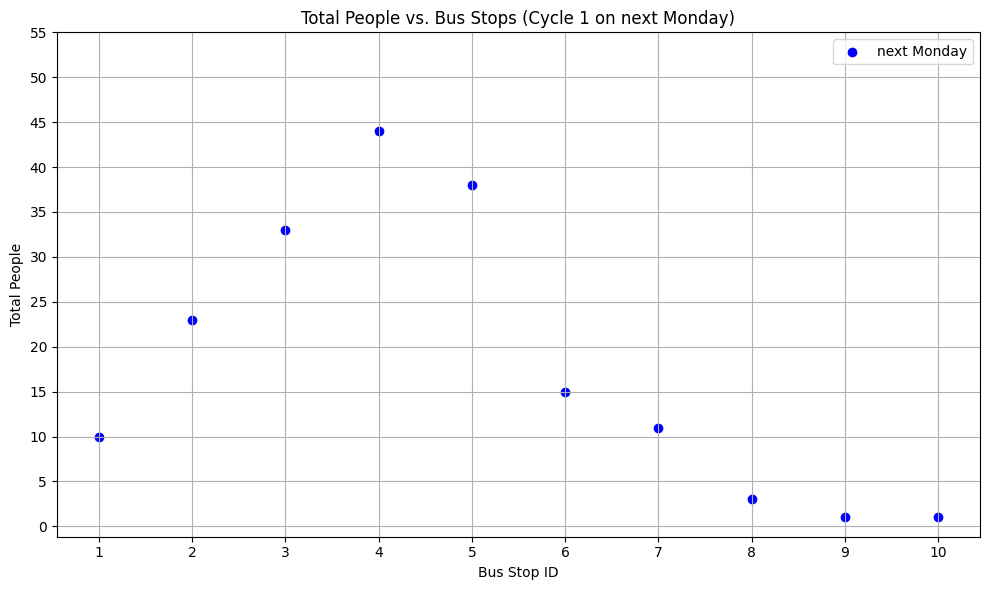

In [322]:
plot_predicted_bus_stop_data(N_cycle='1', route_ID='3', day='next Monday', data = next_week_data)   